## Solution1:

In [38]:
import pandas as pd    #Step 1

link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'   #Step 2

#Step 3: Assigning it to a varuable called users
users = pd.read_csv(link, sep='|', names=["user_id", "age", "gender", "occupation", "zip_code"], skiprows=[0])   #skip the first row and load the datasaet


#Step 4: Calacualting mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print("Mean age per occupation is as follows: ")
print()
print(mean_age_per_occupation)
print()

#Step 5: Calculate the male ratio per occupation and sorting it
occupation_male_ratio = (users[users['gender'] == 'M']
                         .groupby('occupation')['gender']
                         .count() / users.groupby('occupation')['gender'].count())
occupation_male_ratio = occupation_male_ratio.sort_values(ascending=False)

print()
print("Male ratio per occupation (sorted):")
print()
print(occupation_male_ratio)

# Step 6: Calculating the minimum and maximum ages per occupation
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print()
print("Minimum and maximum ages per occupation:")
print()
print(age_range_per_occupation)

#Step 7: Calculating the mean age for each combination of occupation and sex
mean_age_by_occupation_sex = (
    users.groupby(['occupation', 'gender'])['age']
    .mean()
    .reset_index()  # Convert the result to a DataFrame
)
print()
print("Mean age for each combination of occupation and sex:")
print()
print(mean_age_by_occupation_sex)

# Step 8: Calculating the percentage of women and men for each occupation
occupation_gender_percentage = (
    users.groupby(['occupation', 'gender'])
    .size() / users.groupby('occupation')['gender'].count()
) * 100
print()
print("Percentage of women and men for each occupation:")
print()
print(occupation_gender_percentage)



Mean age per occupation is as follows: 

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Male ratio per occupation (sorted):

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.

## Solution 2

In [56]:
import pandas as pd    #Step 1

#Step 2
link = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

#Step 3: Assigning it to the variable euro12
euro12 = pd.read_csv(link)

# Step 4: Select only Goals column
goals_column = euro12['Goals']
print("Goals Column")
print(goals_column)

#Step 5:Number of teams participated in the Euro2012
num_of_teams = euro12['Team'].nunique()
print()
print("Number of teams participated in Euro2012:", num_of_teams)

#Step 6: Number of columns in the dataset
print()
num_of_columns = euro12.shape[1]
print("Number of columns in the dataset:", num_of_columns)

# Step 7: Creating a dataframe discipline and assigning the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print()
print(discipline)
print()

# Step 8: Sort the teams by Red Cards, then to Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print()
print("Red Cards and Yellow Cards:")
print(sorted_discipline)
print()

#Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean()
print("Mean Values of card per team:")
print(mean_yellow_cards_per_team)
print()

#Step 10: Filter teams that scored more than 6 goals
filtered_teams = euro12[euro12['Goals'] > 6]
print("Teams that scored more than 6 goals:")
print(filtered_teams['Team'])
print()

#Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("Teams that start with 'G'")
print(teams_starting_with_G['Team'])
print()

#Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("First 7 columns:")
print(first_7_columns.columns)
print()

#Step 13: Select all columns except the last 3
print("Columns except last 3: ")
print(euro12.columns[:-3])
print()

# Step 14: Present only the Shooting Accuracy from England, Italy and Russia
selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("Shooting accuracy of teams:")
print(selected_teams)








Goals Column
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams participated in Euro2012: 16

Number of columns in the dataset: 35

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11         

## Solution 3

In [73]:
import pandas as pd
import numpy as np    #Step 1


#Step 2: Creating a series of random numbers from 1 to 4
first_series = pd.Series(np.random.randint(1, 5, size=100))

# Creating a Series of random numbers from 1 to 3
sec_series = pd.Series(np.random.randint(1, 4, size=100))

# Creating a Series of random numbers from 10000 to 30000
third_series = pd.Series(np.random.randint(10000, 30001, size=100))

print("First Series:")
print(first_series.head())
print()

print("Second Series:")
print(sec_series.head())
print()

print("Third Series:")
print(third_series.head())
print()

#Step 3: Creating a dataframe of the three series columns
data = pd.DataFrame({'Series_1': first_series, 'Series_2': sec_series, 'Series_3': third_series})
print(data.head())
print()

#Step 4: Changing the name of the columns to bedrs, bathrs, price_sqr_meter
changed_data = data.rename(columns={'Series_1': 'bedrs', 'Series_2': 'bathrs', 'Series_3': 'price_sqr_meter'})
print("Dataframe with updated column headings: ")
print(changed_data.head())

#Step 5: Creating the 'bigcolumn' Series by appending values from the three Series
bigcolumn = first_series.append(sec_series).append(third_series)
bigcolumn_data = pd.DataFrame({'bigcolumn': bigcolumn})
print(bigcolumn_data.head())

#Step 6: Yes, since the length of all three series is 100, the range of indices is from 0 to 99

#Step 7: Chnaging the index to 300
bigcolumn_data.reset_index(drop=True, inplace=True)
data = bigcolumn_data.reindex(range(300))
print(data.head())


First Series:
0    1
1    1
2    2
3    4
4    1
dtype: int32

Second Series:
0    1
1    1
2    1
3    3
4    2
dtype: int32

Third Series:
0    21766
1    29107
2    16542
3    17400
4    15237
dtype: int32

   Series_1  Series_2  Series_3
0         1         1     21766
1         1         1     29107
2         2         1     16542
3         4         3     17400
4         1         2     15237

Dataframe with updated column headings: 
   bedrs  bathrs  price_sqr_meter
0      1       1            21766
1      1       1            29107
2      2       1            16542
3      4       3            17400
4      1       2            15237
   bigcolumn
0          1
1          1
2          2
3          4
4          1
   bigcolumn
0          1
1          1
2          2
3          4
4          1


C:\Users\kashi\AppData\Local\Temp\ipykernel_11856\3074313960.py:37: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bigcolumn = first_series.append(sec_series).append(third_series)


## Solution 4

In [61]:
import pandas as pd
import numpy as np   #Step 1

data = pd.read_csv("C:\\Users\\kashi\\Downloads\\wind.txt", delim_whitespace=True, na_values=['NaN'])   #Step 2

#Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data['date'] = pd.to_datetime(data.index)
data.set_index('date', inplace=True)

#Step 4: Create a function to fix the year
def fix_year(year):
    threshold = 2022
    if year > threshold:
        year -= 100
    return year
data['year'] = data.index.year
data['year'] = data['year'].apply(fix_year)

#Step 6: Computethe number of missing values for each location
missing_values_per_location = data.isna().sum()
total_missing_values = missing_values_per_location.sum()
print("\nTotal Number of Missing Values:", total_missing_values)
print()


#Step 7: Compute how many non-missing values there are in total.
total_entries = data.size
total_missing_values = missing_values_per_location.sum()
total_non_missing_values = total_entries - total_missing_values

print("Total Number of Non-Missing Values:", total_non_missing_values)
print()

#Step8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean Windspeed: {:.2f} knots".format(mean_windspeed))
print()

#Step9: Calculate min, max, mean, and standard deviation for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
loc_stats = loc_stats.T
print("Min, max, mean, and standard deviation for each location:")
print()
print(loc_stats)
print()


#Step 10:Calculate min, max, mean, and standard deviation for each day across all locations
day_stats = data.groupby(data.index.date).agg(['min', 'max', 'mean', 'std'])
print("Min, max, mean and standard deviation for each day: ")
print()
print(day_stats)
print()


#Step 11: Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].groupby([data.index.year, data.index.month]).mean()
print("Average windspeed in January: ")
print(january_avg_windspeed)

#Step 12:Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print(yearly_data)




Total Number of Missing Values: 31

Total Number of Non-Missing Values: 105153

Mean Windspeed: 136.53 knots

Min, max, mean, and standard deviation for each location:

          min      max         mean       std
Yr      61.00    78.00    69.500304  5.188131
Mo       1.00    12.00     6.523274  3.448871
Dy       1.00    31.00    15.728628  8.800335
RPT      0.67    35.80    12.362987  5.618413
VAL      0.21    33.37    10.644314  5.267356
ROS      1.50    33.84    11.660526  5.008450
KIL      0.00    28.46     6.306468  3.605811
SHA      0.13    37.54    10.455834  4.936125
BIR      0.00    26.16     7.092254  3.968683
DUB      0.00    30.37     9.797343  4.977555
CLA      0.00    31.08     8.495053  4.499449
MUL      0.00    25.88     8.493590  4.166872
CLO      0.04    28.21     8.707332  4.503954
BEL      0.13    42.38    13.121007  5.835037
MAL      0.67    42.54    15.599079  6.699794
year  1970.00  1970.00  1970.000000  0.000000

Min, max, mean and standard deviation for each 

## Solution 6

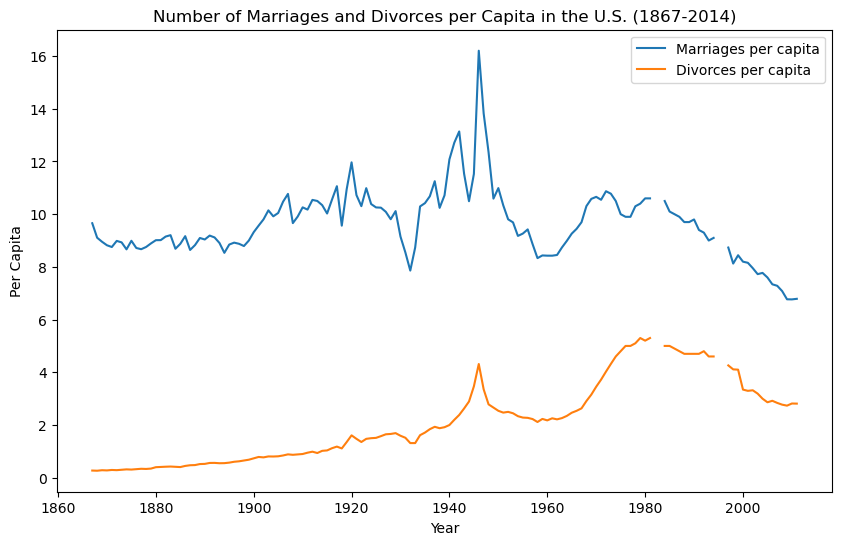

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kashi\Downloads\us-marriages-divorces-1867-2014.csv")

#Calculating marriages and divorces per capita
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

#get columns to plot
columns = ['Marriages_per_capita', 'Divorces_per_capita']

# Create x data
x_data = range(0, data.shape[0])

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column
for column in columns:
    ax.plot(data['Year'], data[column], label=column.replace('_', ' '))

# set title, labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
ax.legend()

#show the final plot visualisation
plt.show()





## Solution 7

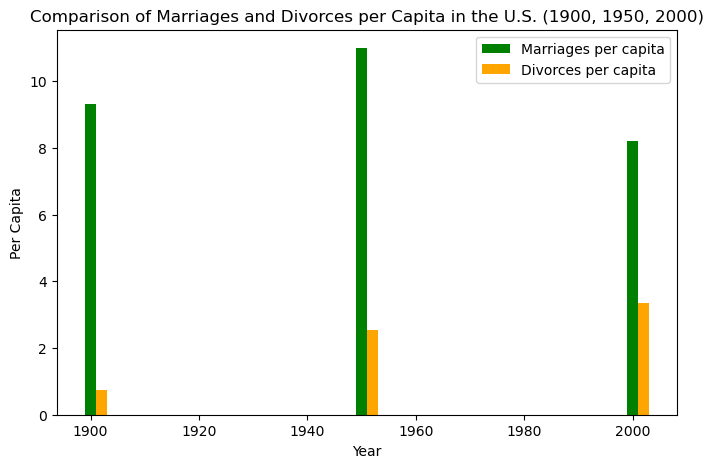

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kashi\Downloads\us-marriages-divorces-1867-2014.csv")

# Calculating marriages and divorces per capita
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

years = [1900, 1950, 2000]  #Selecting data for the required years
filtered_data = data[data['Year'].isin(years)]


plt.figure(figsize=(8, 5))
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_capita'], width=2.0, label='Marriages per capita', color= "green")
plt.bar(filtered_data['Year'] + 2.0, filtered_data['Divorces_per_capita'], width=2.0, label='Divorces per capita', color= "orange")

# Setting labels, title and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()

#show the final visualisation
plt.show()


## Solution 8

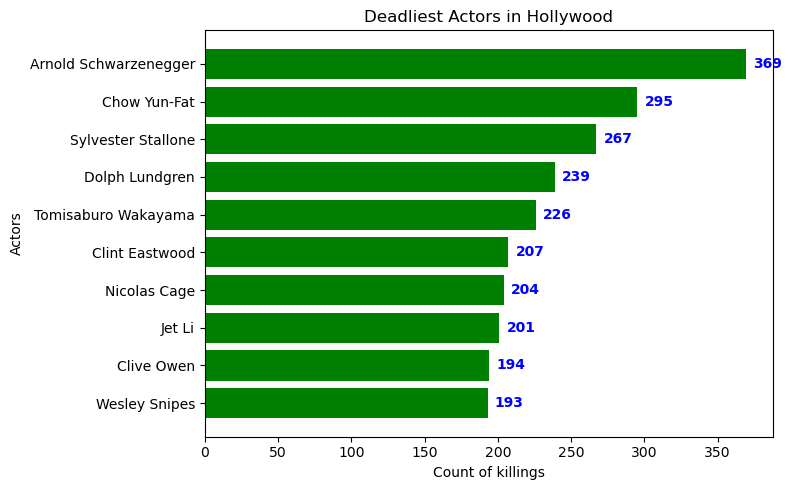

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kashi\Downloads\\actor_kill_counts.csv")

#sorting the dataset
data = data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(data['Actor'], data['Count'], color='green')

#set lables, title
plt.xlabel('Count of killings')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(data['Count']):
    plt.text(value + 5, index, str(value), va='center', color='blue', fontweight='bold')  #this will show the name of actor on the respective bar

# Display the plot
plt.tight_layout()
plt.show()


## Solution 9

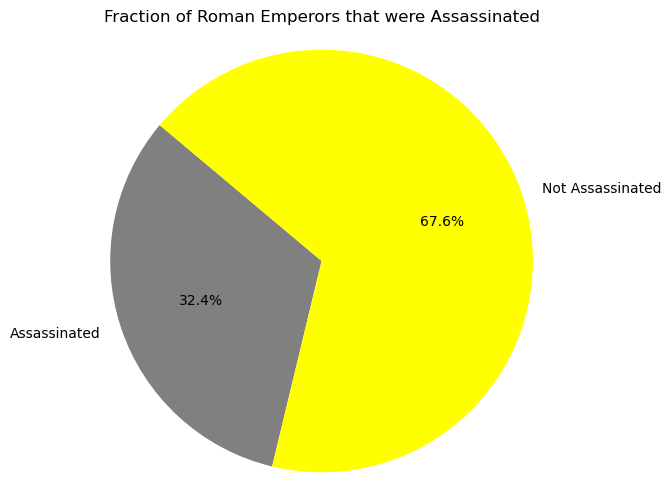

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kashi\Downloads\roman-emperor-reigns.csv")

assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]  #this gives the number of assasinated emperors

non_assassinated_count = data.shape[0] - assassinated_count #this gives the number of emperors that were  not assassinated

# Set labels and values
labels = ['Assassinated', 'Not Assassinated']
values = [assassinated_count, non_assassinated_count]

plt.figure(figsize=(6, 6))   #created pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['grey', 'yellow'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.title('Fraction of Roman Emperors that were Assassinated')   #adding a title

#showing the visualisation
plt.show()


## Solution 10

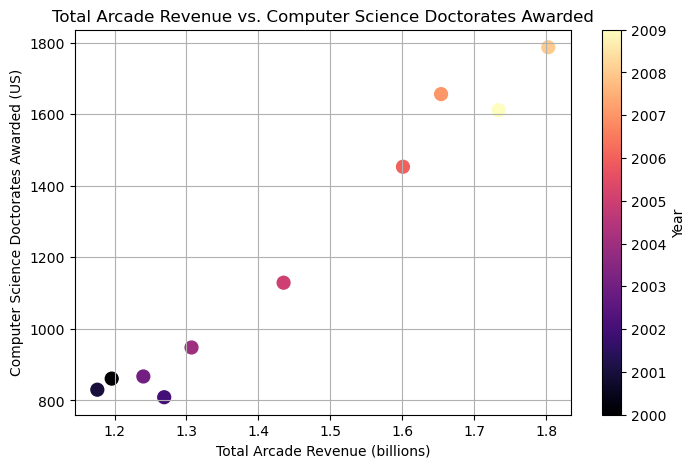

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kashi\Downloads\arcade-revenue-vs-cs-doctorates.csv")

#extracting data
years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
no_of_doctorates = data['Computer Science Doctorates Awarded (US)']

plt.figure(figsize=(8, 5))   #creates a scatter plot
plt.scatter(revenue, no_of_doctorates, c=years, cmap='magma', s=85, alpha=1)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('No of Computer Science Doctorates Awarded (US)')
plt.title('Total Arcade Revenue vs. Computer Science Doctorates Awarded')


cbar = plt.colorbar()  #adds colorbar for reference
cbar.set_label('Year')

# Show the plot
plt.grid(True)
plt.show()
